In [1]:
# Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
# IMPORT DATA

data=pd.read_csv(r"C:\Users\Tanuj\Downloads\archive (4)\diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.shape

(53940, 11)

In [4]:
# DATA PREPROCESSING
# --DATA CLEANING--
# --IDENTIFING AND REMOVE OUTLIERS--
# --ENCODING_CATEGORICAL_VALIABLES--


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
data = data.drop(['Unnamed: 0'],axis = 1)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
data = data.drop(data[data['x']==0].index)
data = data.drop(data[data['y']==0].index)
data = data.drop(data[data['z']==0].index)
data.shape

(53920, 10)

In [8]:
data.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


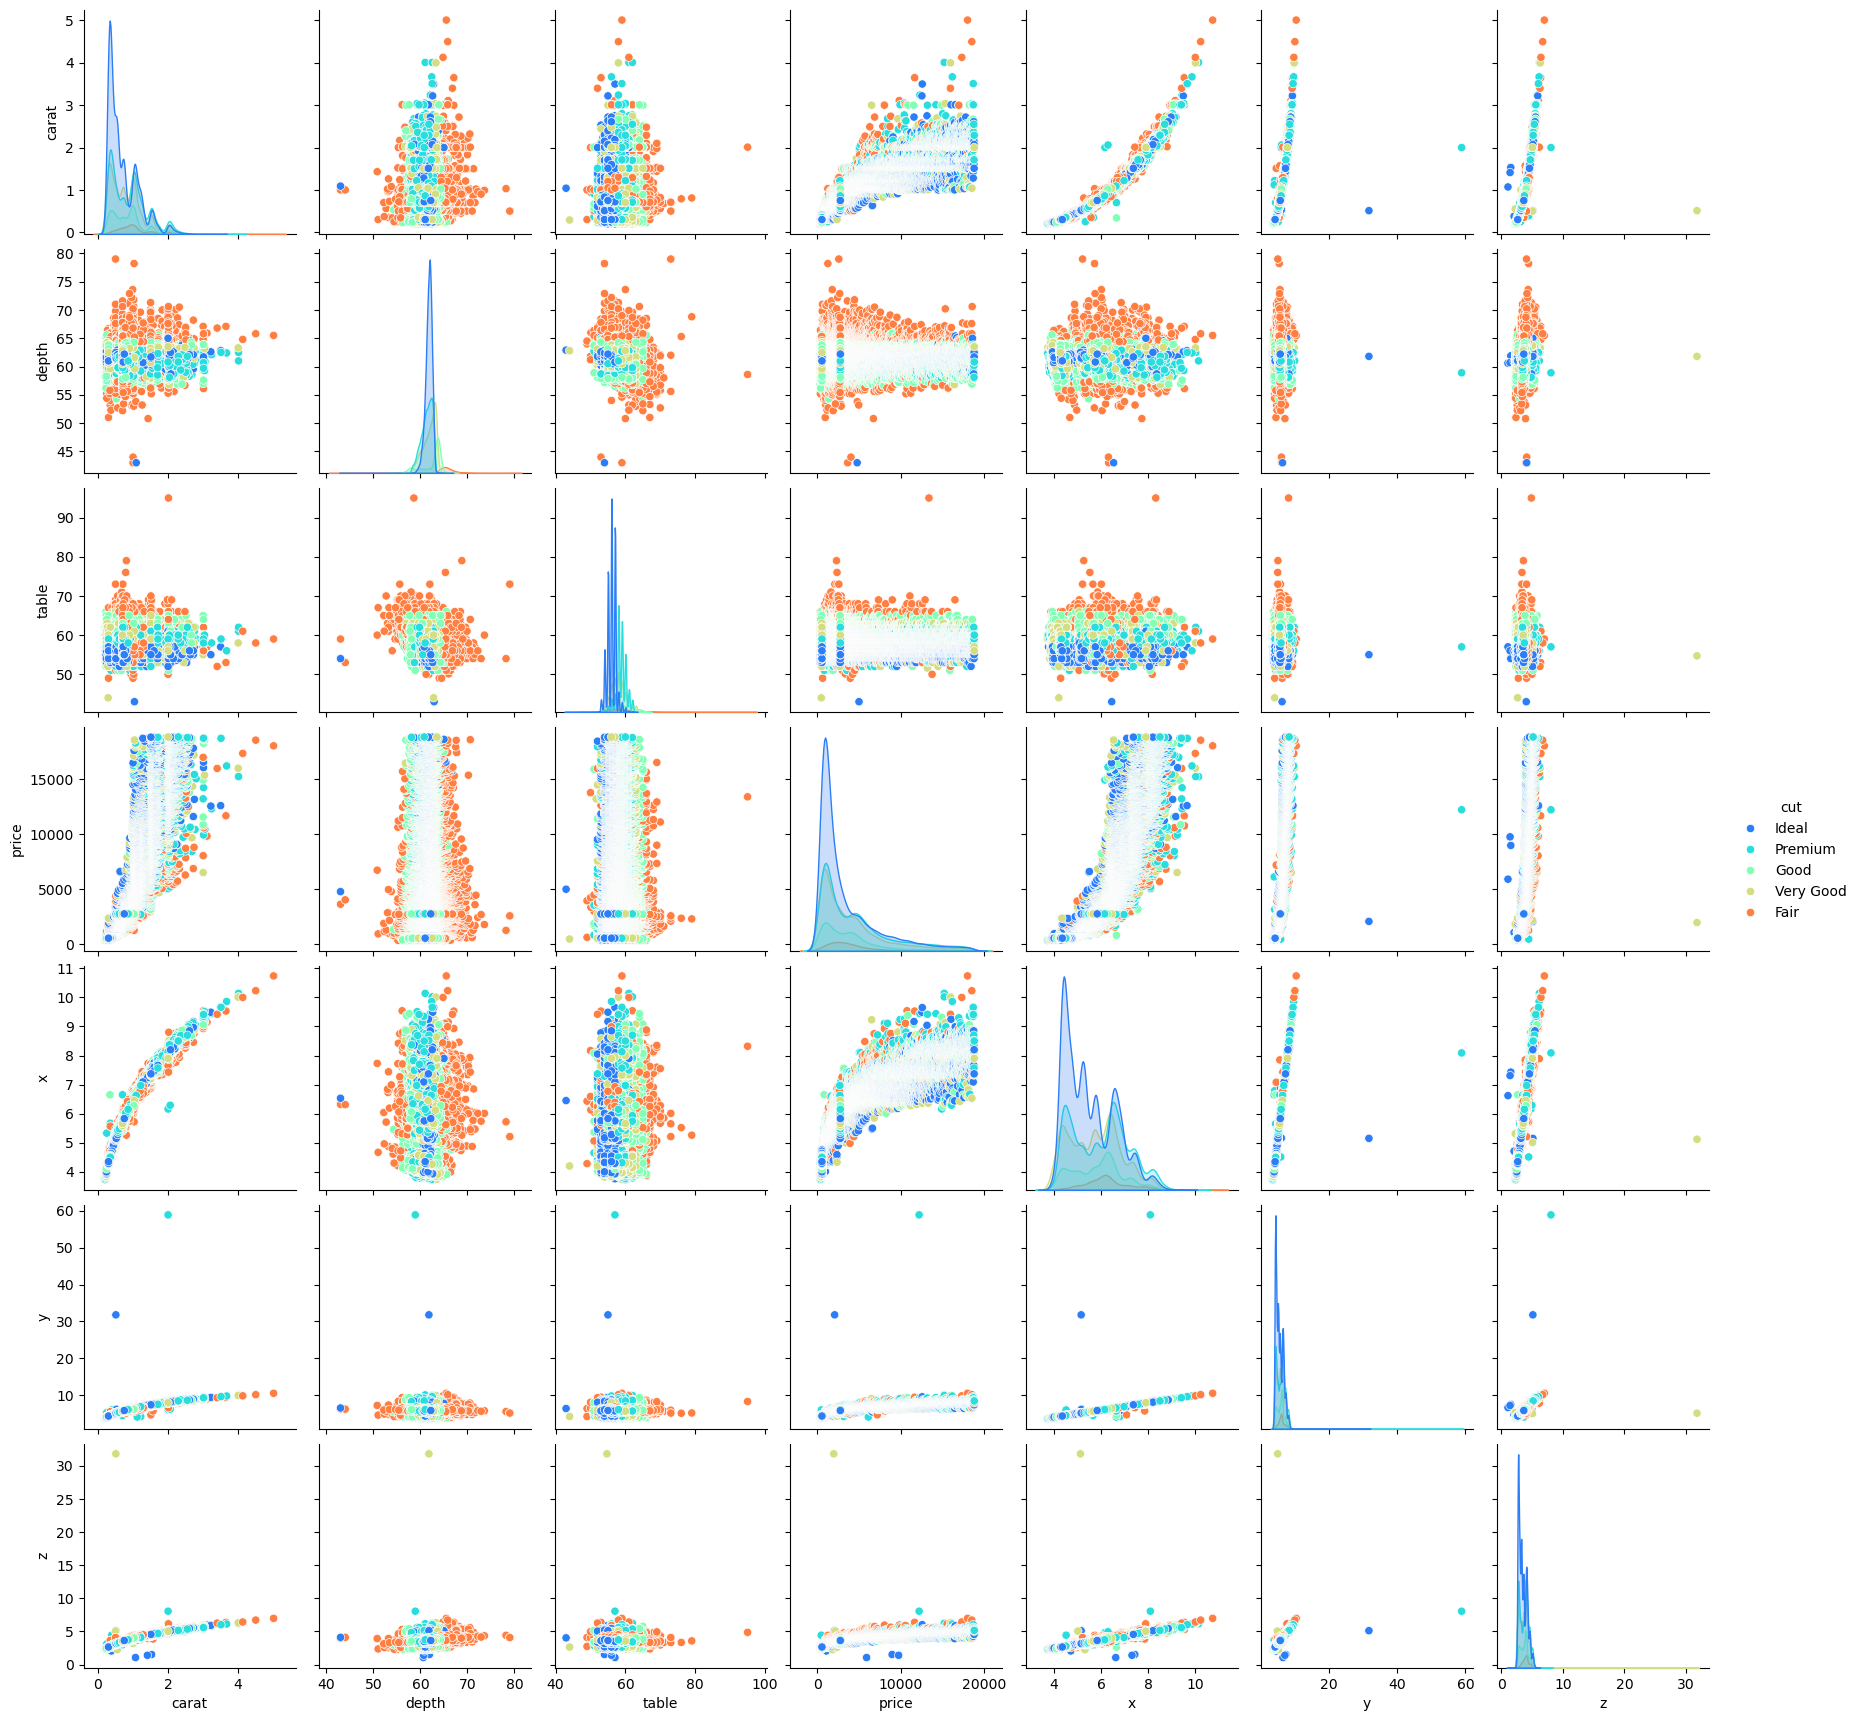

In [9]:
ax =sns.pairplot(data, hue = 'cut', palette= 'rainbow')

Text(0.5, 1.0, "Regression line on price vs 'x'")

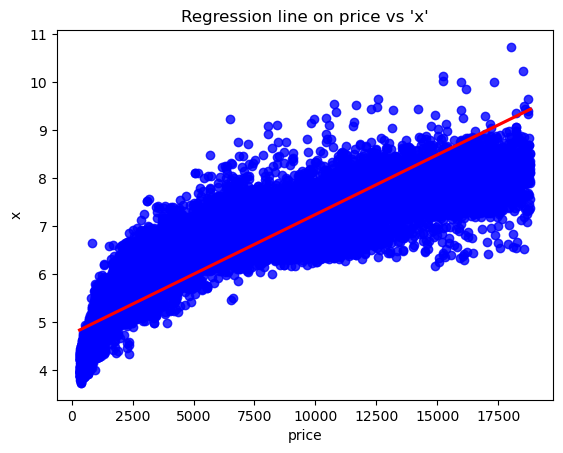

In [10]:
ax=sns.regplot(x='price',y='x',data=data,fit_reg=True,scatter_kws={'color':'blue'},line_kws={'color':'red'})
ax.set_title("Regression line on price vs 'x'")

Text(0.5, 1.0, "Regression line on price vs 'y'")

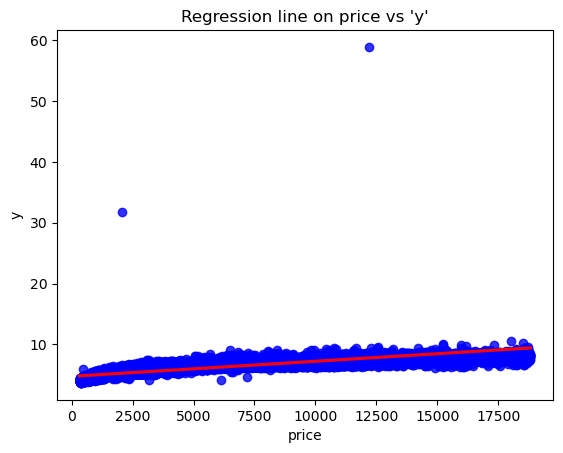

In [11]:
ax=sns.regplot(x='price',y='y',data=data,fit_reg=True,scatter_kws={'color':'blue'},line_kws={'color':'red'})
ax.set_title("Regression line on price vs 'y'")

Text(0.5, 1.0, "Regression line on price vs 'z'")

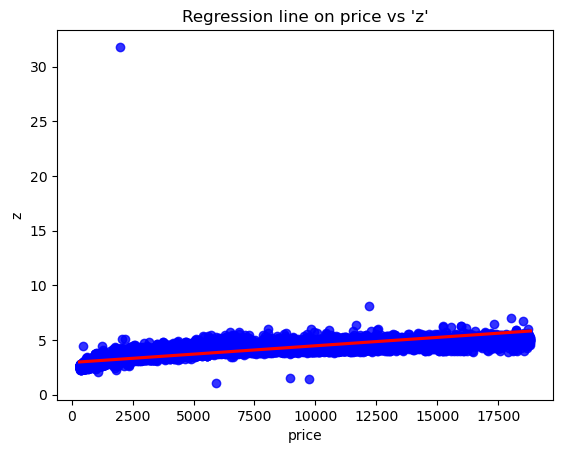

In [12]:
ax=sns.regplot(x='price',y='z',data=data,fit_reg=True,scatter_kws={'color':'blue'},line_kws={'color':'red'})
ax.set_title("Regression line on price vs 'z'")


Text(0.5, 1.0, "Regerrison line on price vs 'depth'")

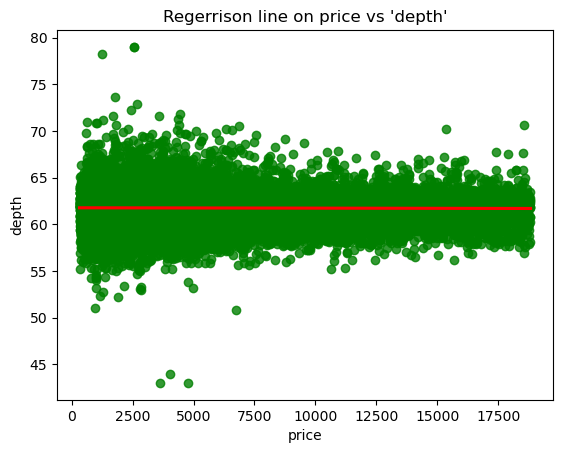

In [13]:
ax= sns.regplot(x='price',y='depth',data=data,fit_reg=True,scatter_kws={'color':'green'},line_kws={'color':'red'})
ax.set_title("Regerrison line on price vs 'depth'")

Text(0.5, 1.0, "Regression line on price vs 'table'")

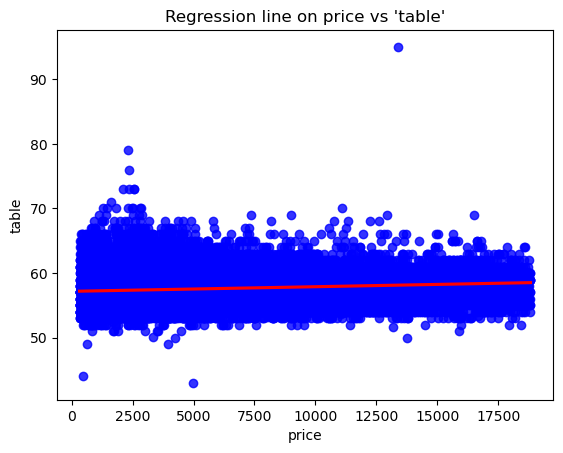

In [14]:
ax=sns.regplot(x='price',y='table',data=data,fit_reg=True,scatter_kws={'color':'blue'},line_kws={'color':'red'})
ax.set_title("Regression line on price vs 'table'")

In [15]:
# Dropping the Outliers

data=data[(data["depth"]<75)&(data["depth"]>45)]
data=data[(data["table"]<80)&(data["table"]>40)]
data=data[(data["x"]<30)]
data=data[(data["y"]<30)]
data=data[(data["z"]<10)&(data["z"]>2)]
data.shape

(53907, 10)

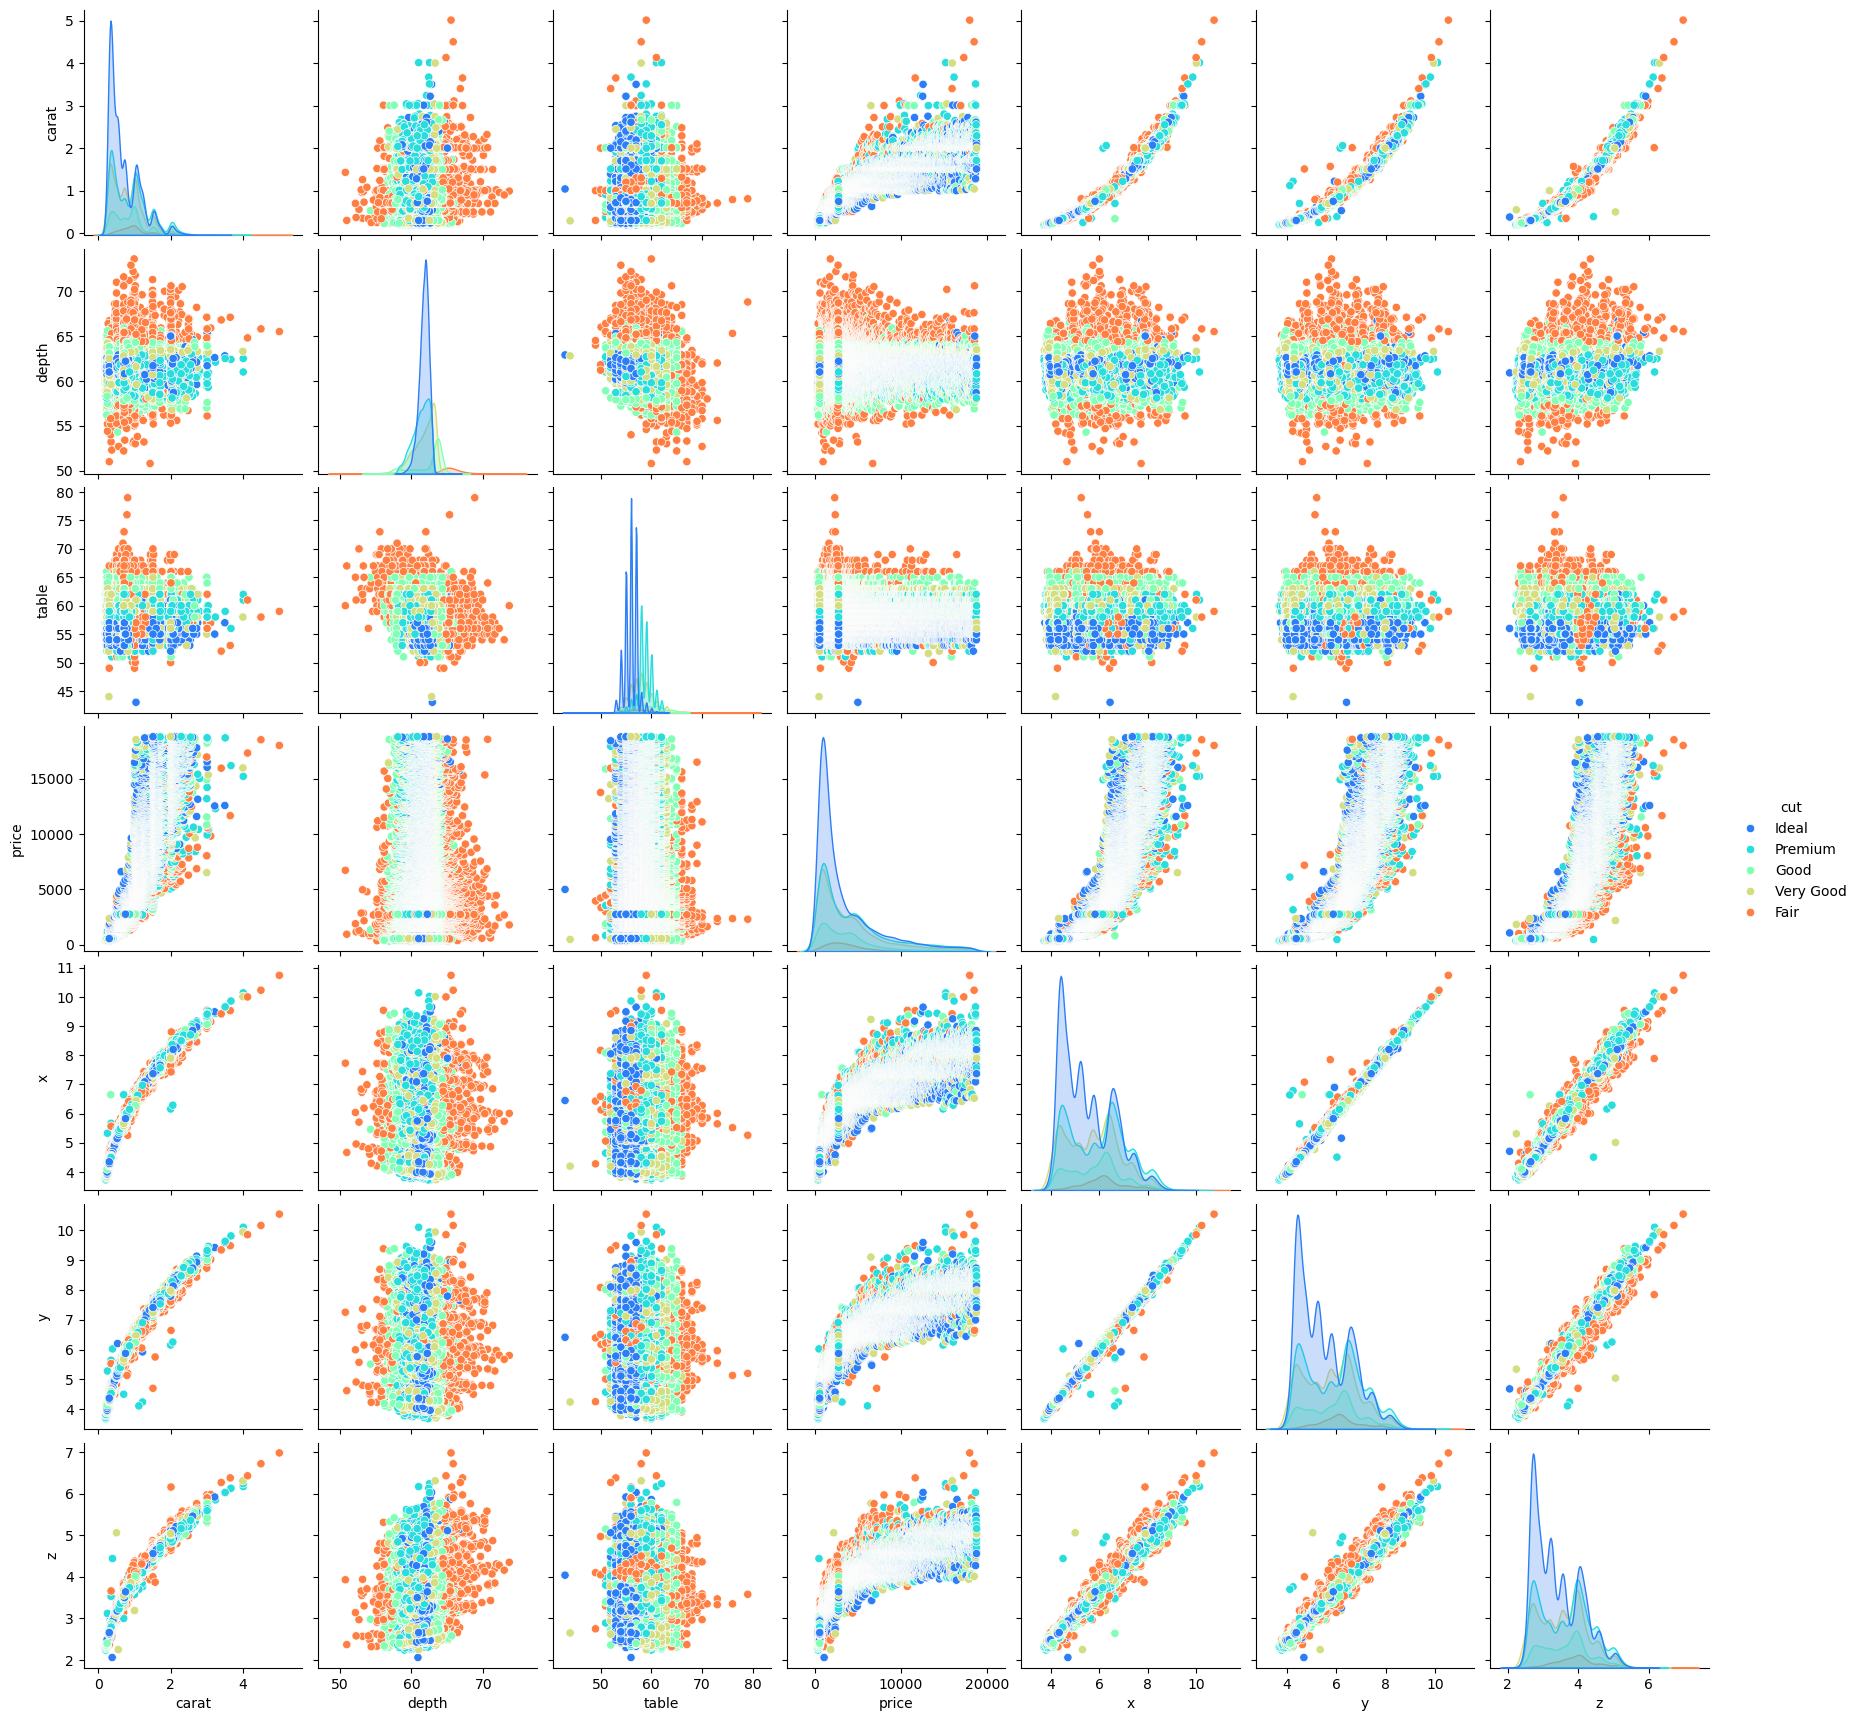

In [16]:
ax=sns.pairplot(data,hue='cut',palette='rainbow')

In [17]:
#Get list the categorical variables
s = (data.dtypes=="object")
object_cols = list(s[s].index)
print('Categorical variables')
print(object_cols)


Categorical variables
['cut', 'color', 'clarity']


C:\Users\Tanuj\AppData\Local\Temp\ipykernel_22248\2068019119.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.violinplot(x='cut',y='price',data=data,palette='rainbow',scale='count')
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_22248\2068019119.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax=sns.violinplot(x='cut',y='price',data=data,palette='rainbow',scale='count')


Text(0.5, 0, 'cut')

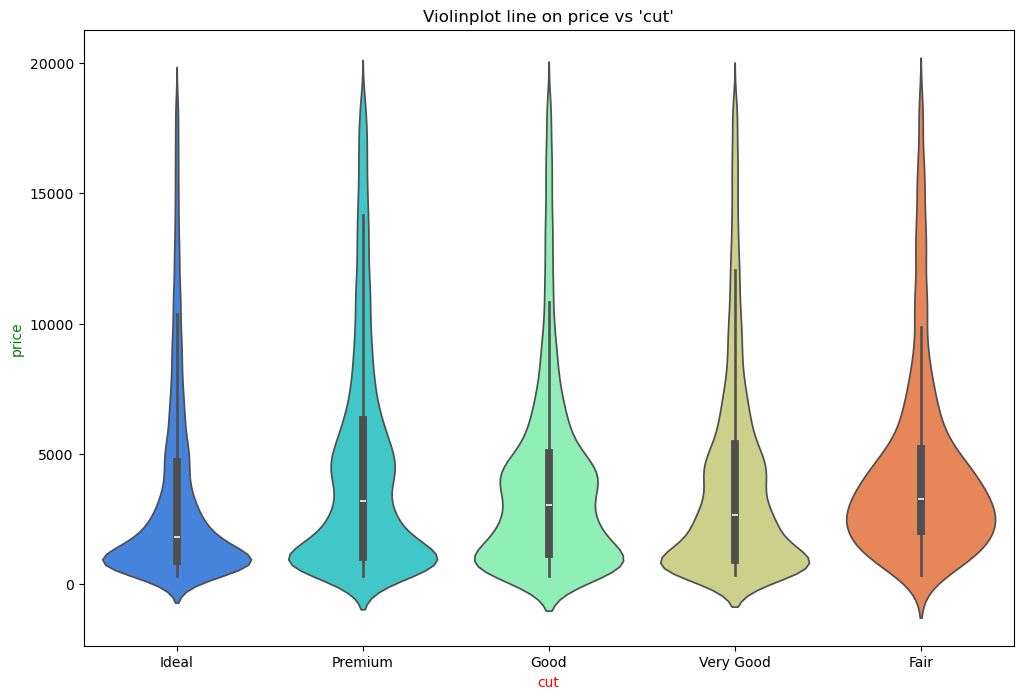

In [18]:
plt.figure(figsize=[12,8])
ax=sns.violinplot(x='cut',y='price',data=data,palette='rainbow',scale='count')
ax.set_title("Violinplot line on price vs 'cut'")
ax.set_ylabel("price",color='green')
ax.set_xlabel("cut",color='red')

C:\Users\Tanuj\AppData\Local\Temp\ipykernel_22248\240688311.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x='color',y='price',data= data, palette='rainbow',scale='count')
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_22248\240688311.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x='color',y='price',data= data, palette='rainbow',scale='count')


Text(0, 0.5, 'price')

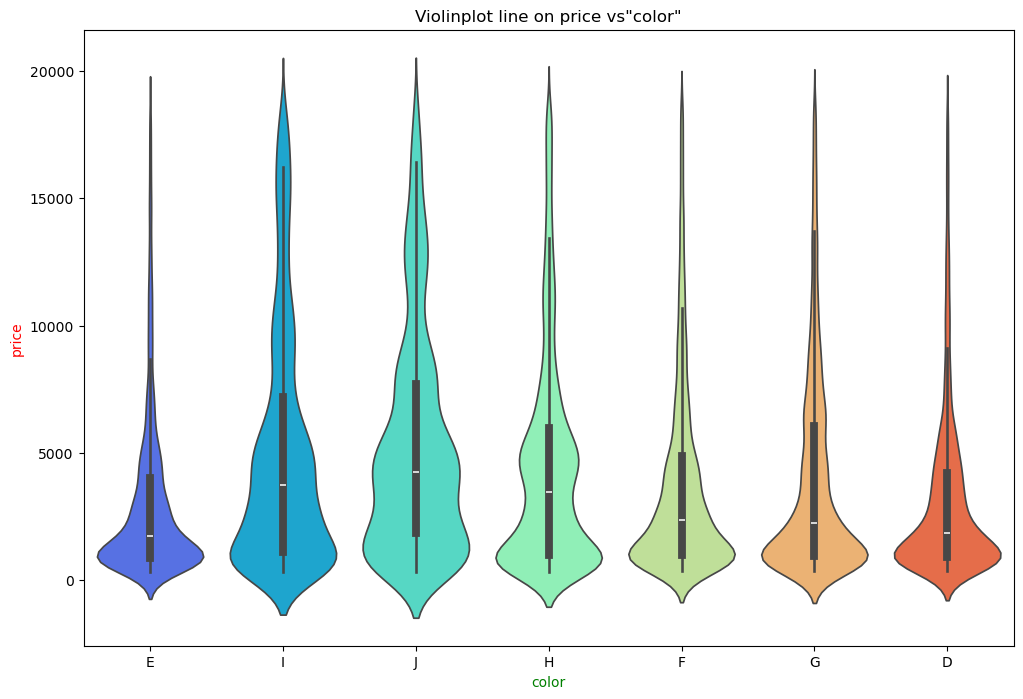

In [19]:
plt.figure(figsize=[12,8])
ax = sns.violinplot(x='color',y='price',data= data, palette='rainbow',scale='count')
ax.set_title('Violinplot line on price vs"color"')
ax.set_xlabel("color",color='green')
ax.set_ylabel("price",color='red')

C:\Users\Tanuj\AppData\Local\Temp\ipykernel_22248\3739559487.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x='clarity',y='price',data=data,palette='rainbow',scale='count')
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_22248\3739559487.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x='clarity',y='price',data=data,palette='rainbow',scale='count')


Text(0, 0.5, 'price')

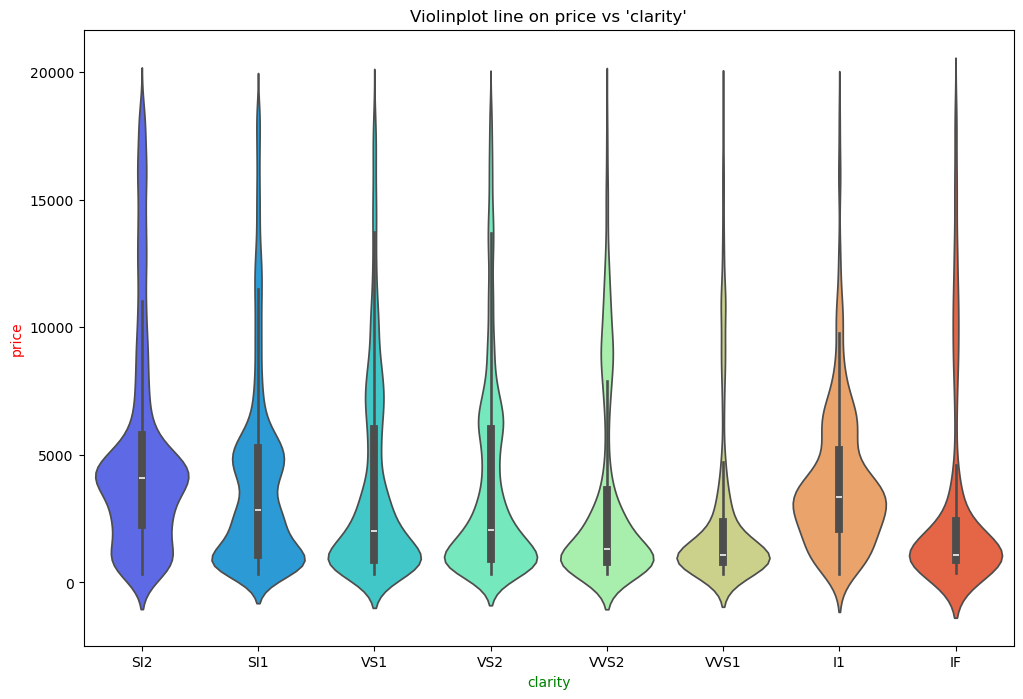

In [20]:
plt.figure(figsize=[12,8])
ax = sns.violinplot(x='clarity',y='price',data=data,palette='rainbow',scale='count')
ax.set_title("Violinplot line on price vs 'clarity'")
ax.set_xlabel("clarity",color='green')
ax.set_ylabel("price",color='red')

In [21]:
# Make copy to avoid changing original data
label_data=data.copy()

# Apply label_Encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col]=label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [22]:
data.describe()

,carat,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


<Axes: >

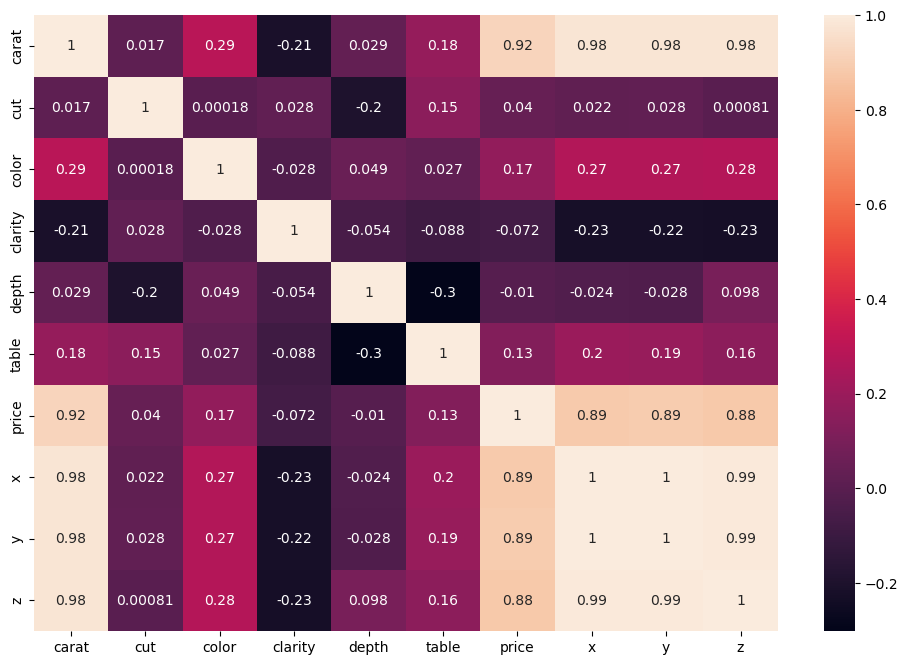

In [23]:
plt.figure(figsize=[12,8])
sns.heatmap(label_data.corr(),annot=True)

In [24]:
X= label_data.drop(['price'],axis=1)
y=label_data['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=7)

In [26]:
# Building pipelines of standard scaler and model for varios regerssion

pipelines_lr=Pipeline([('scaler1',StandardScaler()),
                       ('lr_classifier',LinearRegression())])
pipelines_dt=Pipeline([('scaler2',StandardScaler()),
                       ('dt_classifier',DecisionTreeRegressor())])
pipelines_rf=Pipeline([('scaler3',StandardScaler()),
                       ('rf_classifier',RandomForestRegressor())])
pipelines_kn=Pipeline([('scaler4',StandardScaler()),
                       ('kn_classifier',KNeighborsRegressor())])
pipelines_xgb=Pipeline([('scaler5',StandardScaler()),
                        ('xgb_classifier',XGBRegressor())])

# list of all the pipelines
pipelines=[pipelines_lr,pipelines_dt,pipelines_rf,pipelines_kn,pipelines_xgb]

#Dictionary all pipelines and model types for ease of reference
pipe_dict={0:'LinearRegression',1:'DecisionTree',2:'RandomForest',3:'KNeighbors',4:'XGBRegressor'}

# fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train,y_train)


In [32]:
cv_result_rms=[]
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model,X_train,y_train,scoring="neg_root_mean_squared_error",cv=10)
    cv_result_rms.append(cv_score)
    print((pipe_dict[i],cv_score.mean()))

('LinearRegression', -1348.811823756951)
('DecisionTree', -747.267274909669)
('RandomForest', -546.4299436857674)
('KNeighbors', -823.6560820178805)
('XGBRegressor', -547.6450882631359)


In [34]:
pred =pipelines_xgb.predict(X_test)

In [36]:
# Model evaluation

print("R^2:",metrics.r2_score(y_test,pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9803842902183533
Adjusted R^2: 0.9803711810338256
MAE: 280.1733446465832
MSE: 307728.16599314264
RMSE: 554.7325175191577
